# When carpool is a good idea?


## Introduction
Carpool is the sharing of car journeys, which are mainly provided by the rider sharing compenies. The matching of carpool 

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
df = pd.read_json("https://data.cityofchicago.org/resource/m6dm-c72p.json?$limit=2000&$order=trip_start_timestamp"
                  ,convert_dates=['trip_start_timestamp','trip_end_timestamp'])

In [116]:
df

,additional_charges,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,fare,pickup_census_tract,pickup_centroid_latitude,pickup_centroid_location,...,pickup_community_area,shared_trip_authorized,tip,trip_end_timestamp,trip_id,trip_miles,trip_seconds,trip_start_timestamp,trip_total,trips_pooled
0,3.45,NaN,NaN,NaN,NaN,NaN,50.0,NaN,41.993930,"{'type': 'Point', 'coordinates': [-87.75835358...",...,12.0,False,0,2018-11-01 01:00:00,1b8bd4bcc09c8f204f76d0a7cbcc81e6a7afdf8f,41.664562,2937,2018-11-01 00:00:00,53.45,1
1,2.50,NaN,41.890609,"{'type': 'Point', 'coordinates': [-87.75604671...",-87.756047,25.0,2.5,NaN,NaN,NaN,...,NaN,True,0,2018-11-01 00:00:00,1857e48e14ef7b13dc09824d1c6f3ec801659765,1.034688,213,2018-11-01 00:00:00,5.00,1
2,2.50,1.703108e+10,41.892042,"{'type': 'Point', 'coordinates': [-87.63186394...",-87.631864,8.0,7.5,1.703183e+10,41.914747,"{'type': 'Point', 'coordinates': [-87.65400702...",...,7.0,False,0,2018-11-01 00:15:00,009bff6108bdad18224f166699744a5231958c0d,2.551712,558,2018-11-01 00:00:00,10.00,1
3,2.50,NaN,41.689730,"{'type': 'Point', 'coordinates': [-87.66905440...",-87.669054,75.0,5.0,NaN,41.689730,"{'type': 'Point', 'coordinates': [-87.66905440...",...,75.0,False,0,2018-11-01 00:15:00,00a86e3b5eb12b9a0f08d7021b72d144e8ba9732,1.829057,299,2018-11-01 00:00:00,7.50,1
4,2.50,1.703106e+10,41.942585,"{'type': 'Point', 'coordinates': [-87.65664409...",-87.656644,6.0,7.5,1.703108e+10,41.907492,"{'type': 'Point', 'coordinates': [-87.63576009...",...,8.0,False,0,2018-11-01 00:15:00,00a9c99fb790a7320fbe9208933fe75f20d68122,3.970069,472,2018-11-01 00:00:00,10.00,1
5,2.50,1.703124e+10,41.892658,"{'type': 'Point', 'coordinates': [-87.65253448...",-87.652534,24.0,5.0,1.703103e+10,41.972668,"{'type': 'Point', 'coordinates': [-87.66386549...",...,3.0,True,0,2018-11-01 00:15:00,01e524f21f75e5593ae7c9ba4fa766aa71eb2793,6.739507,1077,2018-11-01 00:00:00,7.50,2
6,2.50,1.703106e+10,41.936310,"{'type': 'Point', 'coordinates': [-87.65156259...",-87.651563,6.0,10.0,1.703108e+10,41.895033,"{'type': 'Point', 'coordinates': [-87.61971067...",...,8.0,False,0,2018-11-01 00:15:00,02b060175293fc58ec96c23776872323fe3631af,4.622445,697,2018-11-01 00:00:00,12.50,1
7,2.50,1.703106e+10,41.949829,"{'type': 'Point', 'coordinates': [-87.64396537...",-87.643965,6.0,10.0,1.703108e+10,41.892508,"{'type': 'Point', 'coordinates': [-87.62621490...",...,8.0,False,0,2018-11-01 00:15:00,02b910d23b557bc1deb1c1f92b4eb62981376900,5.362356,814,2018-11-01 00:00:00,12.50,1
8,2.50,NaN,41.717493,"{'type': 'Point', 'coordinates': [-87.64889507...",-87.648895,73.0,12.5,NaN,41.778877,"{'type': 'Point', 'coordinates': [-87.59492543...",...,42.0,True,0,2018-11-01 00:15:00,0303bebde9874f6a7b2169db0fecdc9670616082,7.841297,955,2018-11-01 00:00:00,15.00,1
9,2.50,NaN,NaN,NaN,NaN,NaN,20.0,1.703107e+10,41.929047,"{'type': 'Point', 'coordinates': [-87.65131087...",...,7.0,False,0,2018-11-01 00:30:00,03ea10ac7097d3ec5bad0b742e72b8efe3af9c9a,10.953472,1805,2018-11-01 00:00:00,22.50,1


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
additional_charges            2000 non-null float64
dropoff_census_tract          1171 non-null float64
dropoff_centroid_latitude     1866 non-null float64
dropoff_centroid_location     1866 non-null object
dropoff_centroid_longitude    1866 non-null float64
dropoff_community_area        1866 non-null float64
fare                          2000 non-null float64
pickup_census_tract           1238 non-null float64
pickup_centroid_latitude      1913 non-null float64
pickup_centroid_location      1913 non-null object
pickup_centroid_longitude     1913 non-null float64
pickup_community_area         1913 non-null float64
shared_trip_authorized        2000 non-null bool
tip                           2000 non-null int64
trip_end_timestamp            2000 non-null datetime64[ns]
trip_id                       2000 non-null object
trip_miles                    2000 non-null float64
trip_secon

In [118]:
df['trips_pooled'].describe()

count    2000.000000
mean        1.316000
std         0.691653
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: trips_pooled, dtype: float64

In [119]:
c=np.histogram(df['trips_pooled'], bins=[1,2,3,4,5])

([<matplotlib.patches.Wedge at 0x10b77940>,
 [Text(-0.7372902790892893, -0.9467856380197357, 'No-sharing'),
  Text(0.8789209028252226, 0.6614363511154311, '2'),
  Text(0.3367934793458851, 1.0471724558400555, '3'),
  Text(0.05184315094302735, 1.0987776334182904, '>3')],
 [Text(-0.43008599613541876, -0.5522916221781791, '78.9%'),
  Text(0.47941140154103046, 0.3607834642447805, '12.7%'),
  Text(0.1837055341886646, 0.5711849759127575, '6.9%'),
  Text(0.028278082332560368, 0.5993332545917947, '1.5%')])

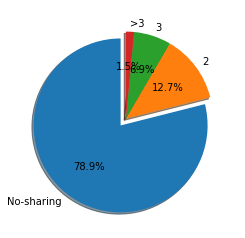

In [120]:
plt.pie(c[0], explode=(0.1, 0, 0, 0), labels=('No-sharing', '2', '3', '>3'), autopct='%1.1f%%',
        shadow=True, startangle=90)

Most of trips are not shared. Very few trips are shared by 3+ riders! In order to meausre the efficiency of carpool, I come up with two metrics. One is the average travel time per mile, another is the ratio of trip's geometric distance to the trip miles. The fomer reflects the waiting time cost due to carpool, while the latter reflects the ratio of detour for picking up another rider. 

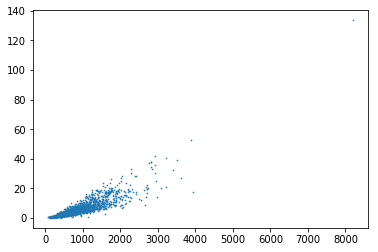

In [124]:
plt.scatter(df['trip_seconds'],df['trip_miles'],s=0.4)

### Time pattern of carpool
I will firstly examine the time pattern 

In [88]:
df.iloc[1]

additional_charges                                                          2.5
dropoff_census_tract                                                        NaN
dropoff_centroid_latitude                                               41.8906
dropoff_centroid_location     {'type': 'Point', 'coordinates': [-87.75604671...
dropoff_centroid_longitude                                              -87.756
dropoff_community_area                                                       25
fare                                                                        2.5
pickup_census_tract                                                         NaN
pickup_centroid_latitude                                                    NaN
pickup_centroid_location                                                    NaN
pickup_centroid_longitude                                                   NaN
pickup_community_area                                                       NaN
shared_trip_authorized                  